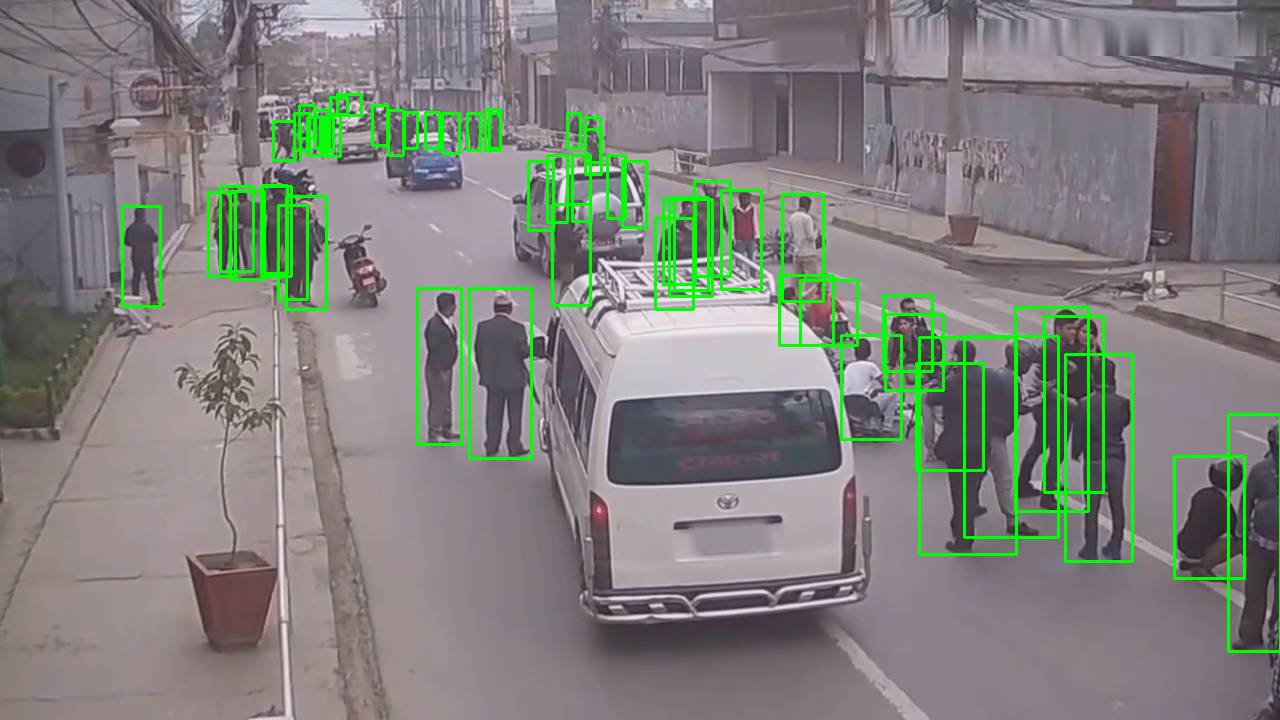

In [33]:
### 以下代码用于检验数据集是否符合YOLO的标注标准，将bbx在图片中框选出来


import cv2
from PIL import Image

# 读取图像
image_path = "/mnt/disk4/czf/yolov8_dataset/train/images/5_1585.jpg"
image = cv2.imread(image_path)

# 读取YOLO标签文件
label_path = image_path.replace('images','labels').replace('.jpg','.txt')
# label_path = "/mnt/disk4/czf/MOT17_dataset/train/labels/MOT17-02-FRCNN_000001.txt"

# 解析标签文件
with open(label_path, 'r') as file:
    lines = file.readlines()

# 循环处理每个对象的标签
for line in lines:
    line = line.strip().split()  # 分割标签字段
    class_id, x_center, y_center, width, height = map(float, line)

    # 计算边界框的坐标（以像素为单位）
    img_height, img_width, _ = image.shape
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height
    x1 = int(x_center - width / 2)
    y1 = int(y_center - height / 2)
    x2 = int(x_center + width / 2)
    y2 = int(y_center + height / 2)

    # 绘制边界框
    color = (0, 255, 0)  # 框的颜色（绿色）
    thickness = 2  # 框的线条宽度
    cv2.rectangle(image, (x1, y1), (x2, y2), color, thickness)

im=Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
im.show()


In [ ]:
import os

# 定义包含jpg文件的文件夹路径
jpg_folder = '/mnt/disk4/czf/HiEve_dataset/train/images'

# 定义包含txt文件的文件夹路径
txt_folder = '/mnt/disk4/czf/HiEve_dataset/train/labels'

# 获取jpg文件夹中的所有文件名
jpg_files = os.listdir(jpg_folder)

# 遍历jpg文件夹中的每个jpg文件
for jpg_file in jpg_files:
    # 构建对应的txt文件路径
    txt_file = os.path.join(txt_folder, jpg_file.replace('.jpg', '.txt'))
    
    # 检查txt文件是否存在
    if not os.path.exists(txt_file):
        print(f"对于 {jpg_file},不存在对应的txt文件")


In [ ]:
from ultralytics import YOLO

model = YOLO('weights/yolov8n.pt')  # 加载预训练模型（建议用于训练）

# 使用模型
model.train(data="mydata.yaml", epochs=1,batch=32)  # 训练模型
model.predict(source='/mnt/disk4/czf/CrowdHuman_dataset/train/images/273271,1017c000ac1360b7.jpg',save=True)


In [2]:
from ultralytics import YOLO

model = YOLO('/home/chenzhuofan/yolov8/runs/detect/train3/weights/best.pt')  # 加载预训练模型（建议用于训练）
metrics = model.val()

Ultralytics YOLOv8.0.180 🚀 Python-3.8.18 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11178MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients
val: Scanning /mnt/disk4/czf/yolov8_dataset/test/labels... 8972 images, 51 backgrounds, 0 corrupt: 100%|██████████| 8972/8972 [00:13<00:00, 650.23it/s]
val: WARNING ⚠️ /mnt/disk4/czf/yolov8_dataset/test/images/5_0768.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /mnt/disk4/czf/yolov8_dataset/test/images/5_0770.jpg: 1 duplicate labels removed
val: New cache created: /mnt/disk4/czf/yolov8_dataset/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 561/561 [03:41<00:00,  2.53it/s]
                   all       8972     244860      0.971       0.91      0.961      0.842
Speed: 0.2ms preprocess, 16.2ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val2


In [ ]:
# oding = utf-8
# -*- coding:utf-8 -*-
import os
import random

trainval_percent = 0.1
train_percent = 0.9
xmlfilepath = '/mnt/disk4/czf/yolox_dataset/Annotations'
total_xml = os.listdir(xmlfilepath)

num = len(total_xml)
list = range(num)
tv = int(num * trainval_percent)
trainval = random.sample(list, tv)

ftest = open('/mnt/disk4/czf/yolox_dataset/ImageSets/Main/test.txt', 'w')
ftrain = open('/mnt/disk4/czf/yolox_dataset/ImageSets/Main/trainval.txt', 'w')

for i in list:
    name = total_xml[i][:-4] + '\n'
    if i in trainval:
        ftest.write(name)
    else:
        ftrain.write(name)

ftrain.close()
ftest.close()



